<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Cours - Econométrie en finance - Séance 11</font></center></b>
    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - A. Birem  - abderraouf.birem@etu.u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2024-2025</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">


 


<br>
<b>Plan du cours : </b>

- Séance 1 – Introduction générale & Introduction avancée à Python
- Séance 2 – Rappels économétriques et bases de données sous python
- Séance 3 – Modèle de régression simple
- Séance 4 - Modèle de régression multiple
- Séance 5 – Violation des hypothèses (1)
- Séance 6 – Violation des hypothèses (2)
- Séance 7 – Caractéristiques des séries temporelles
- Séance 8 – Stationnarité et conséquences, tests de racine unitaire
- Séance 9 – Modélisation en série temporelles : ARMA-ARCH
- Séance 10 - Modèles VAR et correction d'erreur
- <b>Séance 11 – Introduction aux modèles de classification : logit</b>



<b>Références en Econométrie</b> :

- Pesaran, M. H. (2015). Time series and panel data econometrics. Oxford University Press.

- Bourbonnais, R. (2008), Econométrie, Dunod, 7e édition.

- Mignon, V. (2008), Econométrie : Théorie et applications.

- Lardic, S. & Mignon, V. (2002), Econométrie des séries temporelles macroéconomiques et financières.


<b>Références pour la finance</b>  :

-	Finance de marché (Portait – Poncet)
-	Recent advances in linear models and related areas (Shalabh – Heumann)

<b>Références pour python</b>  :

- Presque tout est gratuit et en open source sur internet
- Liste non exhaustive de livres : <a href="https://python.developpez.com/livres/"> python.developper</a>



<br>
<hr style=" border: .5px solid black;">

<a id='plan'></a>
<br>
<b>Séance 11 : </b>
    
    

- [1. Introduction à la classification](#p1)
    - [1.1 Classification et régression](#p1.1)
    - [1.2 Quelques exemples bien connus](#p1.2)
    - [1.3 Validation d'un modèle de classification](#p1.3)
- [2. Apperçu de la cross-validation](#p2)
    - [2.1 Introduction](#p2.1)
    - [2.2 Intuition : échantillons test et d'entrainement](#p2.2)
    - [2.3 Aller plus loin : la cross validation](#p2.3)
- [3. Un exemple de classification : probabilité de défaut des banques](#p3)
- [4. Application en finance](#p4)

    



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">



    
# Introduction à la classification <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p1'></a>
    
    

## Classification et régression <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p1.1'></a>    
    

    
<br>
    
- La régression et la classification se différencient par la nature de la variable expliquée :
    - Régression : ce que l'on a fait jusqu'à maintenant où la variable est composée d'éléments de $\mathbb{R}$ 
    - Classification : la variable expliquée est composée d'éléments de $\mathbb{N}$
    
<br>
    
- Généralement, l'ensemble sur lequel est défini la variable expliquée est borné : 
    - Régression : $Y_i \in [a;b] \subset \mathbb{R}$
    - Classification : $Y_i \in [\![k;n]\!] \subset \mathbb{N}$
    
<br>
    
- Rappel : la régression consiste à établir quelle fonction lie les variables explicatives ($X$) à la variable expliquée ($Y$).
- Tout au long de ce cours : hypothèse (sans le dire) de linéarité de cette fonction. C'est à dire :

$$Y = f(X)$$
$$Y = \alpha + \beta X$$

- Objectif de la régession : estimer les coefficients 
    
<br>
    
- Classification : la variable expliquée correspond à des classes (homme/femme, faillite/survie, panne/normal, fraude/pas de fraude, solvable/ non solvable, etc...).
- On peut avoir plus de deux classes (plus rare)
- Objectif : on cherche à établir la probabilité, au vue des données que l'on a, d'appartenir à la classe $i$, $i\in [\![1,n]\!]$, soit $\mathbb{P}(y_k = i \vert X=x)$ 
- Autrement dit : nous ne cherchons pas à estimer les coefficients de la relation entre $Y$ et $X$ mais ceux de la droite qui sépare les classes.
    
<br>
    
- Exemple :
    - On cherche à déterminer l'appartenance à l'une des classe : "homme" ou "femme" (variable expliquée)
    - Variables explicatives : la taille et l'epérance de vie
    - L'idée : les femmes vivent en moyenne plus longtemps, les hommes sont en moyenne plus grands
    - Après estimation : 
        - nous obtenons par exemple que au delà de $1.76m$ et une espérance de vie inférieure à $80$ ans, la probabilité pour que la personne correspondante soit un homme est de $95\%$
        - ainsi pour un individu mesurant $1.59m$ et ayant une espérance de vie de $87$ ans, nous pouvons prédire que c'est une femme à $95\%$
    
    
<br>
    
- Cas de la classification bivarié : nous nous intéresserons ici au cas d'une classification à deux classes, ie
    
$$Y_i \in [\![0,1]\!], \forall i \in [\![1,T]\!]$$
    
- Ainsi, si l'on reprend notre exemple :
    - $1$ : l'individu est une femme
    - $0$ : l'individu est un homme
- Dans ce cas, la probabilité $P(y_k = i \vert X=x)$ que nous obtenons s'interprète de la façon suivante :
    - plus $P$ est proche de $1$, plus l'individu que l'on considère à des chances d'être une femme
    - vice versa lorsque $P$ tend vers $0$
    
<br>
    
- L'avantage de la classification bivariée : une seule probabilité à estimer
- Dans le cas de $n$ classes : $n-1$ probabilité à estimer (correspondant à chaque fois à la probabilité d'appartenir à la classe $k$, versus toutes les autres classes). Plus difficile à interpréter. 
    
    
    



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">


## Quelques exemples connus <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p1.2'></a>    
    

    
    
- Suggestion de films sur Netflix (vidéos Youtube, Disney, Canal+ etc...) :
    - rassembler un ensemble de critères sur les films : 
        - style : action, aventure, comédie, documentaires, indépendant, fantastique, français, fiction...
        - acteurs : on va pas faire la liste, ce serait un peu long
        - réalisateurs : idem
        - type de contenu : émission, film, série, télé-réalité, etc...
        - durée
        - époque
        - ...
    - à partir de ces variables, on peut établir des "distances" entre les films
    - on ajoute évidemment aussi comme "variables explicatives" les films que vous-même avez regardé
    - En croisant l'ensemble de ces facteurs, ces plateformes sont capable d'établir la probabilité pour que tel ou tel autre film vous convienne (ceux qui ont la plus forte probabilité vous sont proposés en premier).
    
<br>
    
- Commentaires "hors-cours" :
    - ça n'a pas l'air comme ça mais ces aglo marchent très bien : les algo de YouTube (par exemple) sont capable de dire si la personne qui utilise un compte est bien la personne propriétaire de ce compte (exemple avec Netflix, mon compte et les copains) $\Rightarrow$ non prise en compte par l'algo
    - grande rapidité pour ranger l'utilisateur dans des cases (30mintes pour TikTok, YouTube 2-3heures)
    - principe de bulle : une fois que l'algo vous a ranger dans des critères, il est complexe d'en ressortir
    
<br>
    
- Exemple bancaire : les modèles de solvabilité pour l'attribution de crédit immobilier
    - récolte des données :
        - salaire
        - age
        - genre
        - situation familliale
        - dépenses et type de consommation
        - ...
    - on fait tourner des modèles avec ces données pour établir votre solvabilité et décider si oui ou non vous êtes éligible à un crédit.
    

    



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">


## Validation d'un modèle de classification <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p1.3'></a>    
    
    
    
- Régression : 
    - inférence statistique pour évaluer la qualité du modèle
    - erreur de prévision

<br>
    
- Classification c'est un peu différent :
    - inférence sur les paramètres (quand il y en a)
    - erreur de prévision
    - matrice de confusion
    
<br>
    
- Inférence sur les résultats : comme en régression
    
- Erreur de prévision : pour de "nouvelles" observation, quelle est l'erreur faite par le modèle
    
- Matrice de confusion : tableau des taux de bonnes et mauvaises classifications
 
<br>
    
<img style="width:200px;height:200px" src="data/Matrice-de-confusion.png">
    
    

<br>
    
- Enfin, parmi d'autres mesures, la courbe ROC est bien souvent utilisée (fonction de répartition des vrais positifs en fonction des faux positifs) :

    
    
<img style="width:300px;height:300px" src="data/roc_curve.png">  
    



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">




    
# Apperçu de la cross-validation <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p2'></a>
    
    
## Introduction <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p231'></a>
    
<br>

<p style="text-align:justify;">  
Petit retour rapide sur le principe et l'utilité de l'économétrie, et de la modélisation de manière générale.     
</p>

- la modélisation permet de rendre compte de la relation qui peut exister entre différentes variables
- l'économétrie utilise des méthodes de modélisation pour tester la validité de théories économiques

<p style="text-align:justify;">  
<b>Exemple</b> : la loi d'Okun établie qu'il doit exister une relation négative entre le taux de croissance du PIB et le taux de croissance du taux de chômage. En effet, un taux de croissance élevé doit inciter les entreprises à investir d'une part, et doit permettre de stimuler la demande (de biens et servies notamment). Cette dynamique conduit les entreprises à embaucher, et donc s'en suit une diminution du taux de chômage. 
</p>

<p style="text-align:justify;">  
$\Rightarrow$ Voilà une <b>théorie économique</b> basée sur un raisonnement économique (on peut établir un système d'équations conduisant à l'idée qu'il existe une relation plus ou moins linéaire et négative entre nos deux variables). 
</p>

<p style="text-align:justify;">  
Empiriquement : nous utilisons les données observées de la croissance du PIB et du taux de chômage d'un ou plusieurs pays pour vérifier la "prédiction" de la théorie économique (relation négaitve). Pour ce faire, nous avons recours à des méthodes de régression économétrique (MCO ici puisque l'on a une théorie qui nous prédit une relation linéaire entre les deux variables).
</p>
<p style="text-align:justify;">  
$\Rightarrow$ Une fois la relation vérifiée (ou non) nous pouvons établir des recommandations de politique publique. 
</p>

<p style="text-align:justify;">  
<b>Qu'avons nous oublié ?</b> Un objectif souvent recherché par la modélisation consiste en la capacité des résultats à pouvoir faire des projections. Dans notre cas de la loi d'Okun, l'idée est que l'on puisse, à partir de nouvelles observations du taux de croissance du PIB, prédire (selon notre estimation) quelle sera le taux de chômage attendu.
</p>

<br>

<center><b> Une relation pour laquelle la modélisation est performante :</b></center>

<br>

<img style="width:440px;height:350px;float:left;margin:10px" src="data/cross_val_1.png">
<img style="width:440px;height:350px;float:right;margin:10px" src="data/cross_val_2.png">




</span>

</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<p><center><b> Une relation pour laquelle la modélisation est moins performante :</b></center></p>


<br>

<img style="width:440px;height:350px" src="data/cross_val_3.png">



<br>

<p style="text-align:justify;">  
<b>Comment s'assurer que notre démarche est la bonne ?</b> que notre modèle sera efficace pour prédire ce qu'il se passera pour de nouvelle observations des variables explicatives ? Deux solutions au moins :
</p>

- Bien choisir la méthode de régression : dans le deuxième cas ci-dessus, il est probable qu'un modèle non-linéaire (avec une forme quadratique par exemple) sera plus adapté qu'un MCO classique. Pour ce faire : 
    - Une bonne statistique descriptive
    - Un bon recul sur la théorie économique (cf la loi d'Okun)
    - Un bon recul sur la littérature empirique
- La validation croisée (cross-valdation) : se fier à la qualité du modèle estimé, <b>hors-échantillon</b>. 


<br>__Références :__
- The elements of statistical learning - T. Hastie, R. Tibshirani, J. Friedman
- Pour aller plus loin : cross-validation dans le machine learning (en anglais), <a href="https://scikit-learn.org/stable/modules/cross_validation.html">scikit-learn</a>


</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Intuition : échantillons test et d'entrainement <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p2.2'></a>

<br>


<p style="text-align:justify;">  
Pour comprendre le principe de la validation coirsée, nous allons commencer par nous intéresser à la notion "d'hors échantillonage". Cette notion est un abus de langage, nous préfèrerons parler d'échantillons test et d'entrainement.
</p>


<b>L'idée en quatre étapes</b> : 
- nous séparons l'échantillon en deux ($75\%$ - $25\%$ par exemple)
- on estime le modèle sur l'échantillon le plus grand ($75\%$ ici), c'est à dire l'échantillon d'entrainement
- nous utilisons le modèle estimé pour établir les valeurs prédites avec les observations de l'échantillon test (l'échantillon de $25\%$)
- enfin, nous comparons les valeurs prédites avec les vraies valeurs de la variable expliquée contenue dans l'échantillon test : c'est __l'erreur de prévision__

Graphiquement, on peut le voir comme suit :

</span>

In [1]:
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

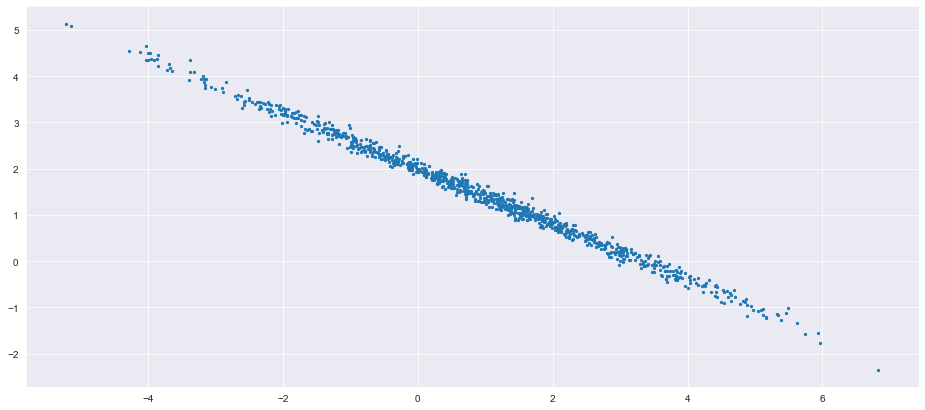

In [2]:
# création de variables négativement et linéairement dépendantes
plt.rcParams["figure.figsize"] = (16, 7)

n = 1000
X = np.random.normal(1,2,n)
y = 2 - 0.6*X + 0.1*np.random.randn(n) 

# visualisation graphique
sns.set_style("darkgrid")
plt.scatter(X,y,s=5)

plt.show()

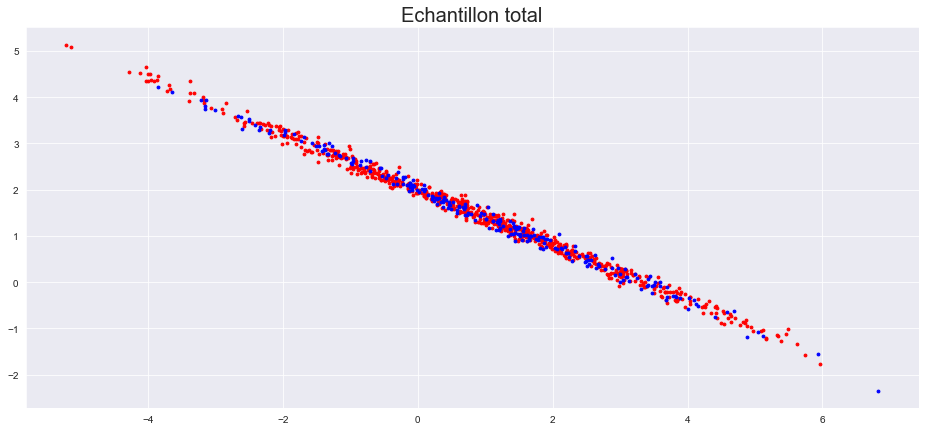

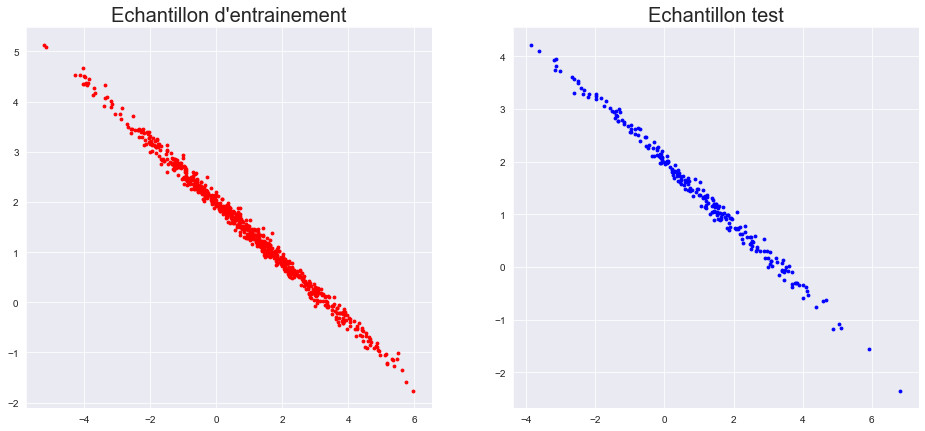

In [3]:
# On met de côté 25% de l'échantillon dans un échantillon test, le reste dans l'échantillon d'entrainement
X_train = X[:750,]
X_test = X[750:,]

y_train = y[:750,]
y_test = y[750:,]

# visualisation graphique : tout l'échantillon

plt.scatter(X_train, y_train, c = 'r',s=8)
plt.scatter(X_test, y_test, c = 'b',s=8)
plt.title('Echantillon total', fontsize = 20)
plt.show()

# visualisation graphique : le deux sous échanitillon séparement

fig, (aX_train, aX_test) = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = (16, 7)
aX_train.scatter(X_train, y_train, c='r',s=8)
aX_train.set_title("Echantillon d'entrainement", fontsize = 20)
aX_test.scatter(X_test, y_test, c='b',s=8)
aX_test.set_title('Echantillon test', fontsize = 20)
plt.show()

In [4]:
# régression de y sur X en échantillon d'entrainement

results = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.040e+05
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:21:21   Log-Likelihood:                 651.68
No. Observations:                 750   AIC:                            -1299.
Df Residuals:                     748   BIC:                            -1290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0038      0.004    491.619      0.0

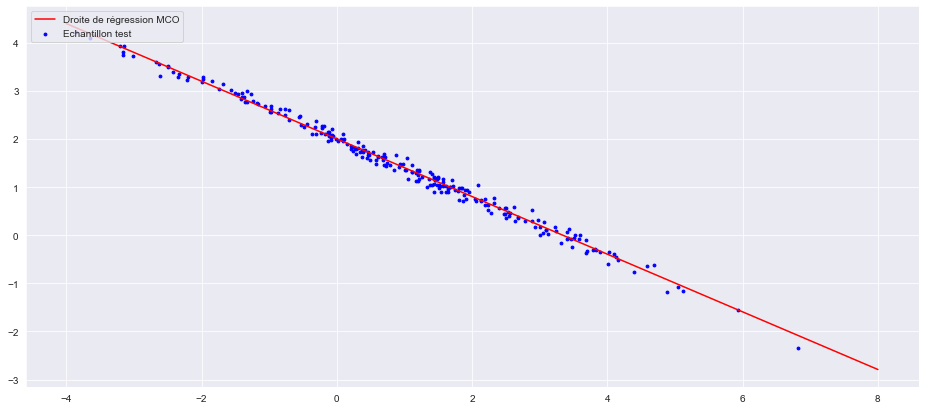

In [5]:
# On recréer des points pour voir la droite de régression
a = results.params[0]
b = results.params[1]
x_axis = np.linspace(-4,8,10)
y_axis = a + b*x_axis 

# Droite de régression
plt.plot(x_axis, y_axis, '-r', label='Droite de régression MCO')
# Echantillon test 
plt.scatter(X_test, y_test, c='b',s=8, label='Echantillon test')
plt.legend(loc='upper left')
plt.show()

In [6]:
# RMSE hors-échantillon
y_pred = a + b*X_test
sm.tools.eval_measures.rmse(results.predict(sm.add_constant(X_test)),y_test)

0.0998913990769101

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<hr style=" border: .75px solid black;">

<p style="text-align:justify;">
Ce que nous avons vu jusqu'à maintenant est tout à fait applicable dans le cadre d'une économétrie classique. Vous pouvez tester la validité de vos modélisations en vous intéressant à la performance en échantillon test de vos estimations. La validation croisée va un peu plus loin et permet d'optimiser les paramètres d'une estimation ou de valider certains tests d'inférence statistique (dans ce cas on aura recours à des méthode de "bootstraping"). 
</p>

__Ce qu'il faut retenir :__
- Il est possible de tester la performance prédictive en procédant à une séparation de l'échantillon entre test et entrainement
- Il est nécessaire pour cela d'avoir un certain nombre d'observations (pour que l'échantillon à $25\%$ ait un certain intérêt)
- Le cas de la série temporelle est un peu particulier : on prend les 25\% en début ou fin d'échantillon 

## Aller plus loin : la cross-validation <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font></font><a id='p2.3'></a>

<p style="text-align:justify;">
La validation croisée est une technique reposant sur l'idée d'une estimation sur des échantillons d'entrainement et de vérifier la performance du modèle en échantillon test. La différence avec ce que nous avons vu jusqu'à maintenant est que l'on va mener cette procédure plusieurs fois, en changeant d'échantillon test et d'entrainement à chaque fois. On procède de façon aléatoire, $k$ fois : la "k fold cross validation".
</p>

<p style="text-align:justify;">Cette méthode est principalement utilisée dans le cadre des modèle d'apprentisage statistique ("machine learning") pour lesquelles il existe un certain nombre d'hyperparamètres, c'est à dire des paramètres qui gèrent la complexité du modèle et sa qualité (et non des coefficients d'impact comme nous avons l'habitude en économétrie). 
</p>

<p style="text-align:justify;">Les méthodes d'apprentissage statistiques s'adaptent bien aux bases de données importantes. C'est un critère à remplir pour que la cross-validation ait un intérêt. 
</p>

 Exemple d'une 5-Fold validation croisée :
</span>

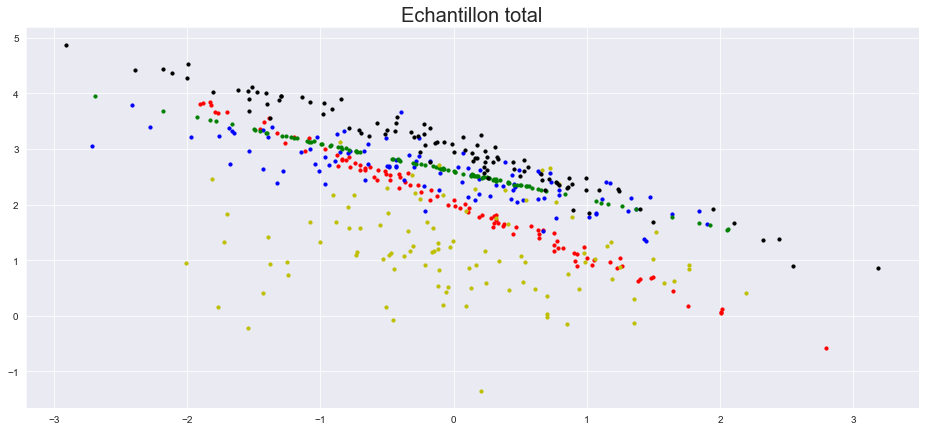

In [7]:
#Génération des données à partir d'une loi normale
n = 100
x1 = np.random.normal(0,1,n)
y1 = 2 - 0.96*x1 + 0.1*np.random.randn(n) 

x2 = np.random.normal(0,1,n)
y2 = 2.5 - 0.4*x2 + 0.3*np.random.randn(n) 

x3 = np.random.normal(0,1,n)
y3 = 2.6 - 0.5*x3 + 0.01*np.random.randn(n) 

x4 = np.random.normal(0,1,n)
y4 = 1.2 - 0.3*x4 + 0.7*np.random.randn(n) 

x5 = np.random.normal(0,1,n)
y5 = 3 - 0.67*x5 + 0.15*np.random.randn(n) 

plt.scatter(x1, y1, c = 'r',s=10)
plt.scatter(x2, y2, c = 'b',s=10)
plt.scatter(x3, y3, c = 'g',s=10)
plt.scatter(x4, y4, c = 'y',s=10)
plt.scatter(x5, y5, c = 'black',s=10)
plt.title('Echantillon total', fontsize = 20)
plt.show()

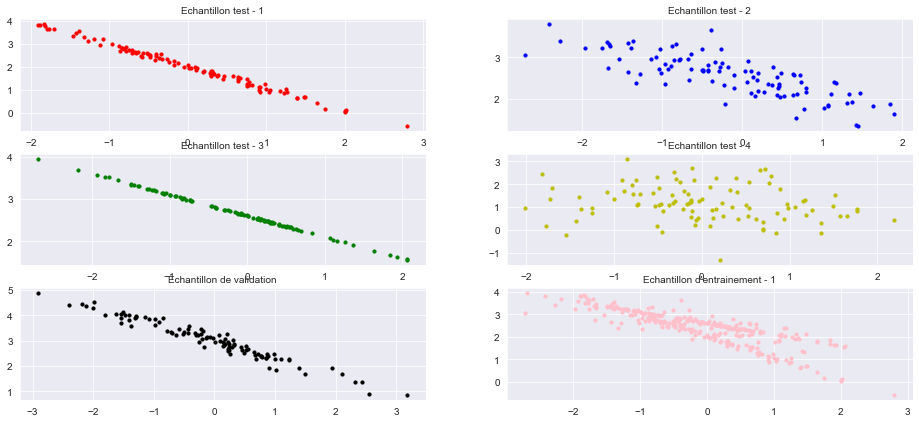

In [8]:
fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2)
ax1.scatter(x1, y1, c='r',s=10)
ax1.set_title("Echantillon test - 1", fontsize = 10)
ax2.scatter(x2, y2, c='b',s=10)
ax2.set_title("Echantillon test - 2", fontsize = 10)
ax3.scatter(x3, y3, c='g',s=10)
ax3.set_title("Echantillon test - 3", fontsize = 10)
ax4.scatter(x4, y4, c='y',s=10)
ax4.set_title("Echantillon test - 4", fontsize = 10)
ax5.scatter(x5, y5, c='black',s=10)
ax5.set_title("Echantillon de validation", fontsize = 10)
x = np.c_[x1,x2,x3]
y = np.c_[y1,y2,y3]
ax6.scatter(x, y, c='pink',s=10)
ax6.set_title("Echantillon d'entrainement - 1", fontsize = 10)

plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<p style="text-align:justify;">  
<b>Conclusion</b> : ce qu'il faut retenir est l'idée que dans cette procédure, on ne cherche pas à obtenir un modèle permettant d'expliquer la relation entre des variables au sein d'un échantillon donné, mais un modèle capable d'expliquer des relation de façon plus "hors échantillon", plus "universelle" (dans la limite de l'existence de lois "universelles" en économie...).
</p>

<br>


</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">



    
# Un exemple de classification : probabilité de défaut des banques <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p2'></a>
    
    
    

    
## Présentation des modèles : logit et KNN <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p3.1'></a>   
    
    
__Régression logistique__

<p style="text-align:justify;">
La régression logistique consiste à modéliser la probabilité d'appartenance à une classe au travers d'une fonction linéaire en $X$, tout en assurant, bien sûr, que la somme des probabilité vaut $1$ et que chacune des probabilité est comprise dans $[0,1]$. Le modèle prend la forme suivante :
</p>

$$log \frac{P(y=0 \vert X=x)}{P(y=1 \vert X=x)} = \beta_0
 + \beta^T_1x$$    
    
<br>
    
Après réarangement, nous obtenons :
    
\begin{cases} P(y=1 \vert X=x) = \frac{1}{1 + exp(\beta_0 + \beta_1^Tx)} \\
    P(y=0 \vert X=x) = 1 - \frac{1}{1 + exp(\beta_0 + \beta_1^Tx)}  
\end{cases}
    
<br>
    
- Pour l'interprétation des coefficients, on se réfère aux _odds ratios_ (OR($x_j$)) : exponentiel du beta associé à la variable $j$.
- Interprétation : une variation d'une unité dans la variable $j$ induit une variation de OR($x_j$) dans la probabilité de la classe $1$.
    
    

<br>

__K-plus proches voisins__

<p style="text-align:justify;">

Le modèle des KNN (k-nearest neighbors) consiste à prédire une valeur pour la variable $y_i$ en fonction des caractéristiques des $y_j$ les plus proches. La question fondamentale de ce modèle tient de la définition du nombre de voisins que l'on souhaite retenir et de la notion de distance : ce sont les hyperparamètres. Le modèle prend donc la forme suivante : 
</p>

$$ \hat{Y}(x) = \frac{1}{k} \sum_{x \in N_k(x)} y_i$$


<p style="text-align:justify;">

Un exemple pour se le représenter : aller au cinéma. Vous n'avez pas vu un film et vous vous basez donc sur la moyenne des avis des personnes que vous connaissez et avec qui vous partagez éventuellement les goûts, pour vous faire une idée sur votre propre appréciation du film. Ca marche aussi avec l'algorithme de proposition d'ami de Facebook.</p>



</span>

In [1]:
# Importation des packages
import pandas as pd

import matplotlib.pyplot as plt                
from matplotlib import *                  
from matplotlib.colors import ListedColormap
import seaborn as sns    

import numpy as np

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Importation des données :
plt.rcParams["figure.figsize"] = (12, 9)
sns.set_style("darkgrid")
df3 = pd.read_csv("data/Default", sep=";")

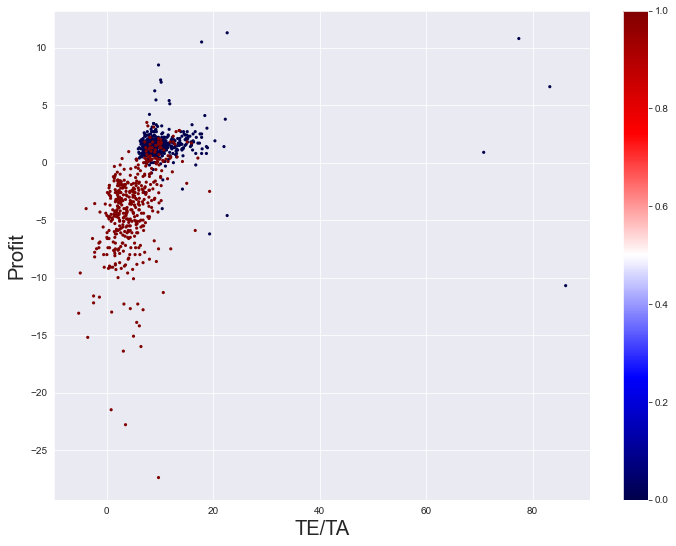

In [13]:
# Nuage de points bivariés
points = plt.scatter(df3['Total equity total assets'], df3['Operating roaa'], 
                     c=df3.Dum_Default,cmap="seismic", lw=0, s=10)
plt.colorbar(points)

plt.xlabel('TE/TA', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)

plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
__Entrainement des modèles__
</span>

In [14]:
labels = np.array(df3.Dum_Default)
features = np.array(df3[['Total equity total assets','Operating roaa']])

#Specifying the training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.25, random_state = 110)

#Entrainement des modèles
    # KNN
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',n_jobs=12)
knn.fit(train_features, train_labels)

    # Logit
logreg = LogisticRegression(C=1e5)
logreg.fit(features, labels)

LogisticRegression(C=100000.0)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
__Matrice de confusion - en échantillon__

_Pour les KNN_

In [20]:
# Confusion matrix - accuracy out sample

y_predict_in = knn.predict(train_features)

cross_tab_in = pd.crosstab(train_labels,y_predict_in).values

a = cross_tab_in[0,0]
b = cross_tab_in[0,1]
c = cross_tab_in[1,0]
d = cross_tab_in[1,1]

print('Global accuracy - KNN: ',accuracy_score(train_labels,y_predict_in))
print('in-sample good classification for non default - KNN: ',round(a/(a+b)*100,2),'%')
print('in-sample good classification for default - KNN: ',round(d/(c+d)*100,2),'%')


pd.crosstab(train_labels,y_predict_in)

Global accuracy - KNN:  0.9911894273127754
in-sample good classification for non default - KNN:  100.0 %
in-sample good classification for default - KNN:  98.23 %


col_0,0,1
row_0,,
0,342,0
1,6,333


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
_Pour le modèle Logit_

In [21]:
# Confusion matrix - accuracy out sample

y_predict_in = logreg.predict(train_features)

cross_tab_in = pd.crosstab(train_labels,y_predict_in).values

a = cross_tab_in[0,0]
b = cross_tab_in[0,1]
c = cross_tab_in[1,0]
d = cross_tab_in[1,1]

print('Global accuracy - logit: ',accuracy_score(train_labels,y_predict_in))
print('in-sample good classification for non default - logit: ',round(a/(a+b)*100,2),'%')
print('in-sample good classification for default - logit: ',round(d/(c+d)*100,2),'%')


pd.crosstab(train_labels,y_predict_in)

Global accuracy - logit:  0.9074889867841409
in-sample good classification for non default - logit:  97.95 %
in-sample good classification for default - logit:  83.48 %


col_0,0,1
row_0,,
0,335,7
1,56,283


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
__Matrice de confusion - hors échantillon__

_Pour les KNN_

In [22]:
# Confusion matrix - accuracy out sample

y_predict_out = knn.predict(test_features)

cross_tab_out = pd.crosstab(test_labels,y_predict_out).values

a = cross_tab_out[0,0]
b = cross_tab_out[0,1]
c = cross_tab_out[1,0]
d = cross_tab_out[1,1]

print('Global accuracy - KNN: ',accuracy_score(test_labels,y_predict_out))
print('Out-sample good classification for non default - KNN: ',round(a/(a+b)*100,2),'%')
print('Out-sample good classification for default - KNN: ',round(d/(c+d)*100,2),'%')


pd.crosstab(test_labels,y_predict_out)

Global accuracy - KNN:  0.9118942731277533
Out-sample good classification for non default - KNN:  92.86 %
Out-sample good classification for default - KNN:  89.57 %


col_0,0,1
row_0,,
0,104,8
1,12,103


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
_Pour le modèle Logit_

In [23]:
# Confusion matrix - accuracy out sample

y_predict_out = logreg.predict(test_features)

cross_tab_out = pd.crosstab(test_labels,y_predict_out).values

a = cross_tab_out[0,0]
b = cross_tab_out[0,1]
c = cross_tab_out[1,0]
d = cross_tab_out[1,1]

print('Global accuracy - Logit: ',accuracy_score(test_labels,y_predict_out))
print('Out-sample good classification for non default - Logit: ',round(a/(a+b)*100,2),'%')
print('Out-sample good classification for default - Logit: ',round(d/(c+d)*100,2),'%')


pd.crosstab(test_labels,y_predict_out)

Global accuracy - Logit:  0.933920704845815
Out-sample good classification for non default - Logit:  96.43 %
Out-sample good classification for default - Logit:  90.43 %


col_0,0,1
row_0,,
0,108,4
1,11,104


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
__Visualisation graphique des résultats__
</span>

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


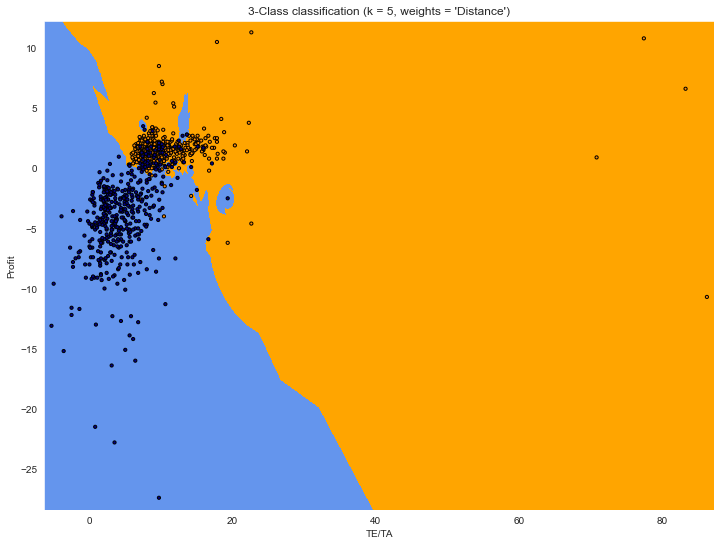

In [25]:
X = features

h = .02
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap_bold,
            edgecolor='k', s=10)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xlabel('TE/TA')
plt.ylabel('Profit')
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (5, 'Distance'))

plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


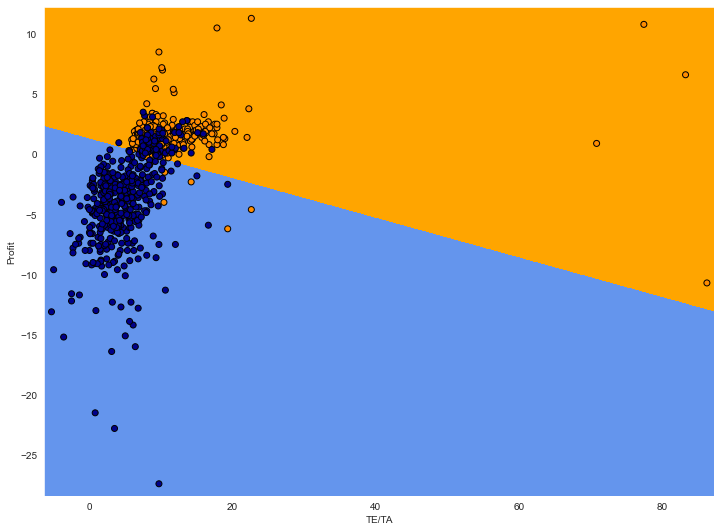

In [26]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=cmap_bold)
plt.xlabel('TE/TA')
plt.ylabel('Profit')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

In [27]:
# ROAA / TER
np.exp(logreg.coef_)

array([[0.8305563 , 0.32416448]])

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: 2.5px solid black;">

    

    
# Application en finance <font color='blue' size="1.5"><i>[(Plan du cours)](#plan)</i></font><a id='p4'></a>
    
## Extraction des données

Données :
- API : alphavantage
- Cours : Microsoft (Nasdaq)
- Fréquence : minute
- Période : les 10 dernières séances

</span>


</span>

In [29]:
    # Math et manipulation de données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import math

    # Modèle et interprétation
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

    # Scraping
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import datetime as dt
from io import StringIO
import matplotlib.pyplot as plt



https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=1min&apikey=WI82DVTHWY1FTTZP&datatype=json&outputsize=full


<AxesSubplot:>

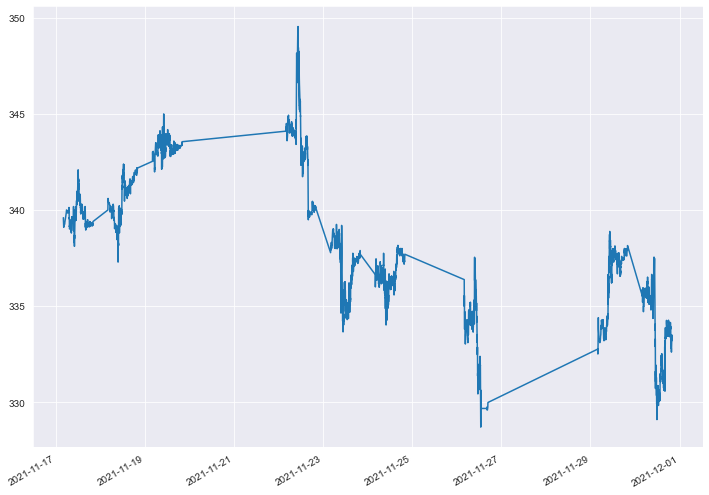

In [78]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

API_KEY = "WI82DVTHWY1FTTZP"
url_base = "https://www.alphavantage.co"

# unix timestamp : le nombre de seconde passée depuis le 1 Janvier 1970 00:00:00

symbol = "MSFT" # Microsoft

interval = "1min"
output_type = "json"

url_suite = "/query?function=TIME_SERIES_INTRADAY&symbol=%s&interval=%s&apikey=%s&datatype=%s&outputsize=full" % (symbol, interval, API_KEY, 
                                                                                                   output_type)

full_url = url_base + url_suite
print(full_url)

resp = rq.get(full_url, headers=headers).json()

data_json = resp["Time Series (1min)"]
df = pd.DataFrame.from_dict(data_json, orient='index')
df.index = pd.to_datetime(df.index)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.iloc[::-1]
df["4. close"].dropna().plot()



<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Traitement des données et création des indicateurs

<p style="text-align:justify;">On défini les fonctions permettant de calculer les différents outils d'analyse utiles à l'analyse des cours :</p>


- Relative Strength Index
- Stochastic K
- MACD
- Simple Moving Average (à 30 et 60 périodes)

<br>

</span>

In [79]:
# On récupère la colone des indice qui donne le temps (date + heure)
df["time"] = df.index

# On identifie les jours séparement les uns des autres (pour éviter les trous entre séance et weekend)
day_start, day2_end = str(df.index[0]).split(" ")[0], str(df.index[-1]).split(" ")[0]
df["day"] = [str(df.index[i]).split(" ")[0] for i in range(df.shape[0])]

l_day = [i for i in set(list(df["day"]))]
l_day = sorted(l_day)

df.reset_index(drop=True,inplace=True)

# Fonction pour renvoyer la variation entre deux minute du cours
def change_in_price(data,var):
    # data must be a dataframe with 'day' and '4. close' variable 
    data["change_in_price"] = data.groupby(['day'])[var].diff()
    return data

df = change_in_price(df, '4. close')

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
__Relative Strength Index__
    
    
<p style="text-align:justify;">Cet indicateur est un indicateur de moment (i.e. représentant les hausses et baisses d'une période donnée) se mesurant comme suit :</p>

$$ RSI_{14,t} = 100 - \frac{1}{1 + H_{(t-13,t)}/B_{(t-13,t)}} $$

avec $ H_{(t-13,t)}$ (respectivement $B_{(t-13,t)}$) la moyenne mobile exponentielle sur les $14$ dernière périodes des hausses (respectivement des baisses).
    

<p style="text-align:justify;">Lorsque le RSI dépasse 70%, un signal de vente est envoyé (on entre dans une zone de sur-achat) et lorsque le RSI passe en dessous de 30%, un signal d'achat est envoyé (zone de sous-achat).</p>

</span>

In [80]:
# Fonction de calcul du RSI
def RSI(data, n) :
    # On créé deux copies du dataframe (pour pouvoir transformer sans problèmes nos variables)
    up_data, down_data = data[['day','change_in_price']].copy(), data[['day','change_in_price']].copy()

    # Pour les jours de hausse, si la variation est négative, on la remplace par 0
    up_data.loc['change_in_price'] = up_data.loc[(up_data['change_in_price'] < 0), 'change_in_price'] = 0

    # Pour les jours de baisse, si la variation est postive, on la remplace par 0
    down_data.loc['change_in_price'] = down_data.loc[(down_data['change_in_price'] > 0), 'change_in_price'] = 0

    # Le calcul du RSI nécessite des valeurs absolues (pour les baisses donc)
    down_data['change_in_price'] = down_data['change_in_price'].abs()

    # Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared 
    # to newer values.
    # On calcule (pour chaque groupe) la moyenne mobile exponentielle (donne plus de valeur au observations récentes)
    ewma_up = up_data.groupby('day')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())
    ewma_down = down_data.groupby('day')['change_in_price'].transform(lambda x: x.ewm(span = n).mean())

    # On calcule la "force relative" (RS)
    relative_strength = ewma_up / ewma_down

    # On transforme en indice
    relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

    # Enfin, on stock ces variables dans le dataframe
    data['down_min'] = down_data['change_in_price']
    data['up_min'] = up_data['change_in_price']
    data['RSI'] = relative_strength_index
    
    return data

df = RSI(df,14)


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br> __Stochastic indicator : %K__

<p style="text-align:justify;"> C'est un indcateur de comparaison du cours de clôture à ceux d'un période données (ici 14 derniers jours). On le calcule comme suit :</p>

$$\%K = \frac{C - L_{14}}{H_{14} - L_{14}} \times 100$$

avec $C$ le cours actuel, $L_{14}$ (respectivement $H_{14}$) la plus petite (respectivement haute) valeur de clôture durant les 14 derniers jours.


<p style="text-align:justify;"><i>Interprétation</i> : un signal de vente est donné lorsque l'oscillateur dépasse 80%, et un signal de vente est envoyé lorsqu'il passe en deça de 20%. L'idée est que l'on compare la zone dans laquelle se situe la clôture par rapport à sa zone "habituelle" définie à partir des 14 dernières séances.</p>

Pour plus d'info à ce sujet, voir : <a href="https://www.investopedia.com/terms/s/stochasticoscillator.asp">Investopedia - %K</a>.

</span>

In [81]:
def k_percent(data,n, var):
    # On fait (comme pour le RSI) une copie du data pour stocker les ups et downs
    low_14, high_14 = data[['day','3. low']].copy(), data[['day','2. high']].copy()

    # On groupe selon les indices puis on applique une fenêtre roulante et on récupère les min et max (de la période)
    low_14 = low_14.groupby('day')['3. low'].transform(lambda x: x.rolling(window = n).min())
    high_14 = high_14.groupby('day')['2. high'].transform(lambda x: x.rolling(window = n).max())

    # On calcule l'oscilateur
    k_percent = 100 * ((data[var] - low_14) / (high_14 - low_14))

    # Enfin, on stock ces données dans le data
    data['low_14'] = low_14
    data['high_14'] = high_14
    data['k_percent'] = k_percent
    
    return data

df = k_percent(df,14, '4. close')

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br> __MACD__

<p style="text-align:justify;"> La moyenne mobile de convergence-divergence est un indicateur de tendance générale. Il permet de remettre en contexte les hausses lorsque le marché est globalement en baisse (par exemple), ou de baisse lorsque le marché est globalement en hausse. On le calcule comme suit : </p>

$$MACD = EMA_{12} - EMA_{26}$$

Avec $EMA_{12}$ (respectivement $EMA_{26}$) la moyenne mobile du cours sur les $12$ (respectivement $26$) dernières séances. 


<p style="text-align:justify;"><i>Interprétation</i> : lorsque la $MACD$ est positive le marché est globalement en hausse, et inversement lorsqu'elle est négative. Par conséquent, lorsque la $MACD$ change de signe, un changement de tendance s'amorce et un signal de vente ou d'achat est envoyé. </p>

Pour plus d'info à ce sujet, voir : <a href="https://www.investopedia.com/terms/m/macd.asp">Investopedia - MACD</a>.

</span>

In [82]:
# On calcule le MACD
def MACD (data, var):
    ema_26 = data.groupby('day')[var].transform(lambda x: x.ewm(span = 26).mean())
    ema_12 = data.groupby('day')[var].transform(lambda x: x.ewm(span = 12).mean())
    macd = ema_12 - ema_26

    # On calcule la moyenne mobile exponentielle
    ema_9_macd = macd.ewm(span = 9).mean()

    # Enfin, on stock ces données dans le data
    data['MACD'] = macd
    data['MACD_EMA'] = ema_9_macd
    
    return data

df = MACD(df, '4. close')

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
__SMA (30 & 60)__

<p style="text-align:justify;">Lorsque la moyenne mobile courte (30) traverse la moyenne mobile longue (60) par le dessous, un signal d'achat est envoyé (le marché est en hausse) et inversement lorsqu'elle la traverse par le dessus (le marché est en baisse).</p>

</span>

In [83]:
def SMA_30_60(data, var):
    # Simple moving average (30 périodes, 30 minutes)
    data["SMA30"] = data[var].rolling(window=30).mean()

    # Simple moving average (100 périodes, 100 minutes)
    data["SMA60"] = data[var].rolling(window=60).mean()
    
    return data

df = SMA_30_60(df, '4. close')

In [84]:
df["var_SMA"] = df.SMA30 - df.SMA60

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

__Un peu de visualisation__

<p style="text-align:justify;">Il peut être intéressant de voir graphiquement ce que donne l'évolution de ces indicateurs par rapport au cours avant de les utiliser dans une analyse. Prenons par exemple le cas des moyennes mobiles simples :</p>

</span>

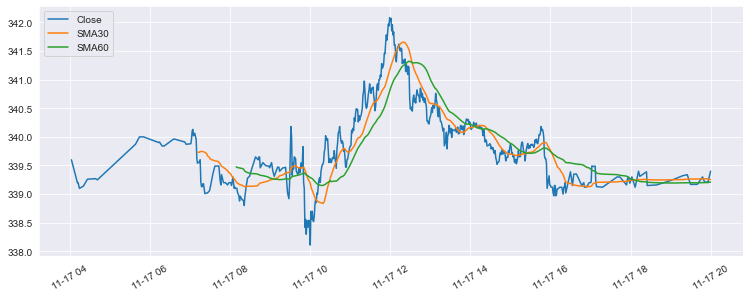

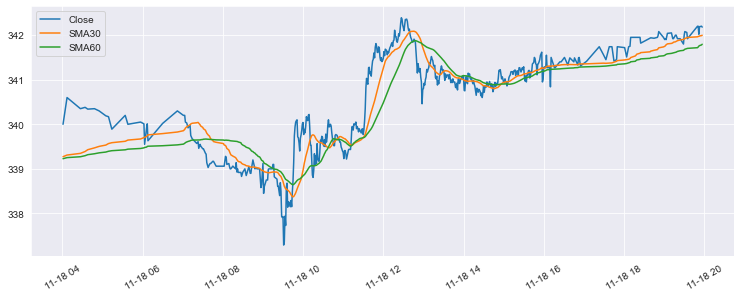

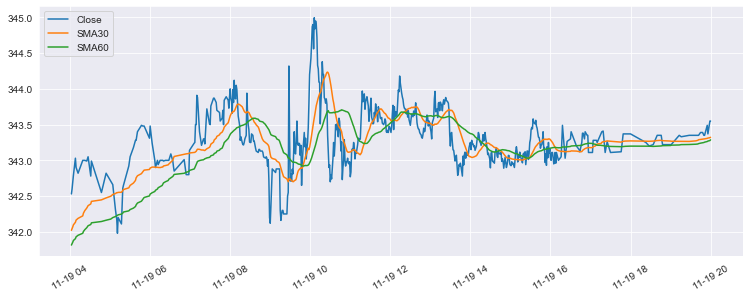

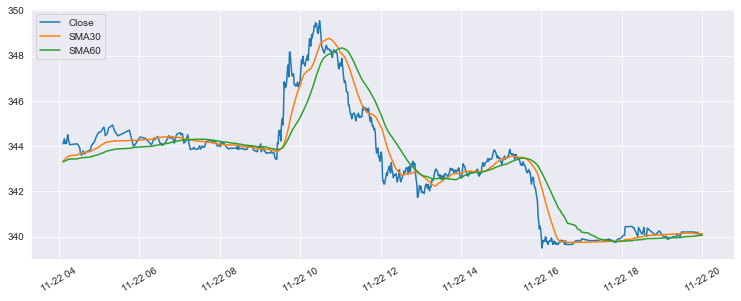

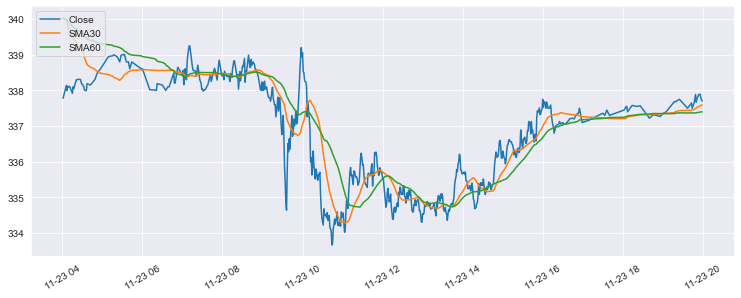

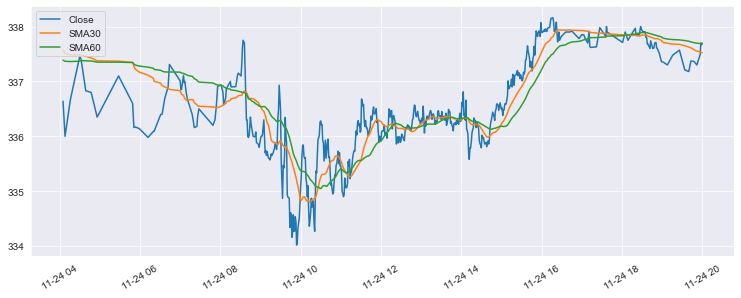

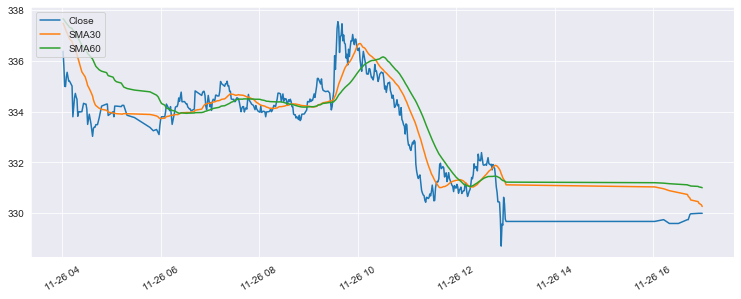

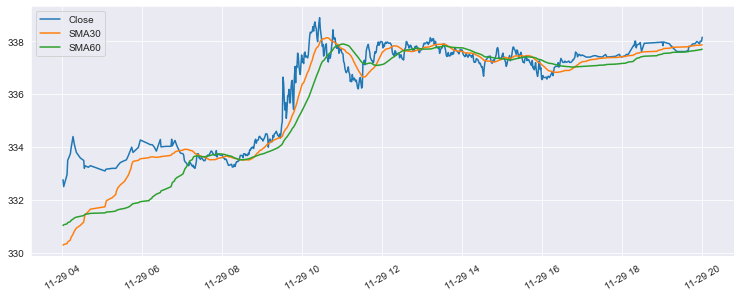

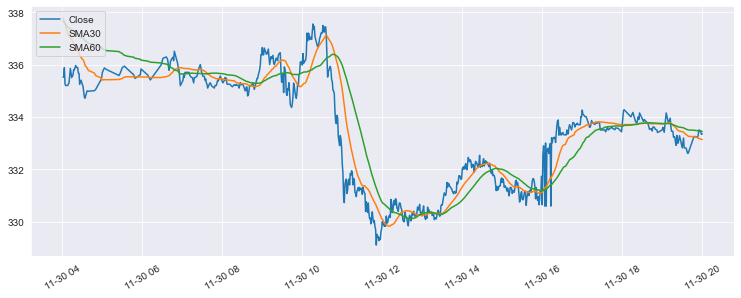

In [85]:
# Exemple d'interprétation des indicateurs : moyennes mobiles simples

for day in l_day :
    # taille de lafigure
    plt.figure(figsize=(12.6,4.6))
    
    # prix (label pour donner un nomà la courbe)
    plt.plot(df[df["day"] == day]["time"], df[df["day"] == day]["4. close"], label = "Close")
    
    # moyenne mobiles simples
    plt.plot(df[df["day"] == day]["time"], df[df["day"] == day]["SMA30"], label = "SMA30")
    plt.plot(df[df["day"] == day]["time"], df[df["day"] == day]["SMA60"], label = "SMA60")
    
    # taille des absisces
    plt.xticks(rotation=30)
    
    # placement de la légende
    plt.legend(loc="upper left")
    plt.show()


<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

## Création de la variable endogène

L'idée ici est de créer la variable $y$ :
- égale à 1 lorsque le cours de demain monte
- 0 sinon

</span>

In [86]:
    # CREATION DE LA VARIABLE ENDOGENE : LES LABELS

# creation d'une colonne indice (pour le cas de panel)
df['index'] = ["MSFT" for i in range(df.shape[0])]
    
# Regroupement par indice boursier
closed_groups = df.groupby(['index'])['4. close']

closed_groups = closed_groups.transform(lambda x : x.shift(1) < x)

# La prédiction contemporaine (l'état du cours à la fin de la journée)
df['Prediction'] = closed_groups*1
# L'état du cours à la fin de la journée de demain (ce que l'on souhaite prédire)
df['Prediction_1'] = [i for i in df.groupby(['index'])['Prediction'].shift(-1)]

# On retire les valeurs manquantes
df = df.dropna()

In [87]:
df.shape

(5189, 22)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>



## Estimation et qualité du modèle 


</span>

In [88]:
# Grab our X & Y Columns.
features = df[['RSI','k_percent','change_in_price','MACD','var_SMA']]
l_features = ['RSI','k_percent','change_in_price','MACD','var_SMA']
labels = df['Prediction_1']

In [89]:
# echantillon test et d'entrainement


train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.25, random_state = 601)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


# entrainement du modele
logreg = LogisticRegression(C=1e5)
logreg.fit(train_features, train_labels)


Training Features Shape: (3891, 5)
Training Labels Shape: (3891,)
Testing Features Shape: (1298, 5)
Testing Labels Shape: (1298,)


LogisticRegression(C=100000.0)

In [90]:
# ACCURACY OUT AND IN SAMPLE: THE SCORE

print("Score in sample: ",round(logreg.score(train_features,train_labels),2))
print("Score out sample: ",round(logreg.score(test_features,test_labels),2))

Score in sample:  0.54
Score out sample:  0.53


In [91]:
# Confusion matrix - accuracy out sample

y_predict_in = logreg.predict(train_features)

cross_tab_in = pd.crosstab(train_labels,y_predict_in).values

a = cross_tab_in[0,0]
b = cross_tab_in[0,1]
c = cross_tab_in[1,0]
d = cross_tab_in[1,1]

print('Global accuracy - logit: ',accuracy_score(train_labels,y_predict_in))
print('in-sample good classification for ups - logit: ',round(a/(a+b)*100,2),'%')
print('in-sample good classification for downs - logit: ',round(d/(c+d)*100,2),'%')


pd.crosstab(train_labels,y_predict_in)

Global accuracy - logit:  0.537650989462863
in-sample good classification for ups - logit:  86.84 %
in-sample good classification for downs - logit:  16.02 %


col_0,0.0,1.0
Prediction_1,,
0.0,1801,273
1.0,1526,291


In [92]:
# Confusion matrix - accuracy out sample

y_predict_out = logreg.predict(test_features)

cross_tab_out = pd.crosstab(test_labels,y_predict_out).values

a = cross_tab_out[0,0]
b = cross_tab_out[0,1]
c = cross_tab_out[1,0]
d = cross_tab_out[1,1]

print('Global accuracy - Logit: ',accuracy_score(test_labels,y_predict_out))
print('Out-sample good classification for ups: ',round(a/(a+b)*100,2),'%')
print('Out-sample good classification for downs: ',round(d/(c+d)*100,2),'%')


pd.crosstab(test_labels,y_predict_out)

Global accuracy - Logit:  0.5254237288135594
Out-sample good classification for ups:  86.08 %
Out-sample good classification for downs:  13.64 %


col_0,0.0,1.0
Prediction_1,,
0.0,600,97
1.0,519,82


In [107]:
logreg.predict(df[l_features].iloc[-10:])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
df["Prediction_1"].iloc[-10:]

5342    1.0
5343    1.0
5344    0.0
5345    0.0
5346    1.0
5347    1.0
5348    0.0
5349    0.0
5350    0.0
5351    1.0
Name: Prediction_1, dtype: float64

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br> 
    
__Conclusion__
    
- Le modèle nous aurais fait gagner notre pari dans 86\% des hausses mais seulement dans 16\% des baisses
- En moyenne, nous aurions été plus souvent gagnant
- Attention : la réalité est bien plus complexe.
    - il faut prendre en compte l'ampleur des variations
    - le modèle utilisé est exessivement trop simple pour la tâche que nous avons souhaité accomplir
    - des modèles non linéaires ont de grandes chances d'être plus adaptés
    - nous n'avons pris qu'un seul indice
    - d'autres mesures peuvent être prises en compte
    
</span>